# Aula 4: Gerando textos

## Vídeo 4.1: Organizando os dados

In [1]:
import pandas as pd
import tensorflow as tf

#url ='https://github.com/allanspadini/curso-tensorflow-proxima-palavra/raw/main/dados/train.zip'
url = "./dados/train.csv"
df = pd.read_csv(url, header=None, names=['ClassIndex','Título','Descrição'])


df['Texto'] = df['Título'] + ' ' + df['Descrição']

2024-12-02 18:50:42.680348: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 18:50:42.702859: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 18:50:42.702881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 18:50:42.703380: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 18:50:42.707262: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df['Texto']

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996    Renteria signing a top-shelf deal Red Sox gene...
119997    Saban not going to Dolphins yet The Miami Dolp...
119998    Today's NFL games PITTSBURGH at NY GIANTS Time...
119999    Nets get Carter from Raptors INDIANAPOLIS -- A...
Name: Texto, Length: 120000, dtype: object

In [9]:
import random
import numpy as np
random.seed(42)
df_sample = df.sample(n=1000)

In [49]:
df_sample['Texto'].sample(n=5).values

array(['South African President Mbeki holds new talks on Ivory Coast President Thabo Mbeki met with Ivory Coast Prime Minister Seydou Diarra for three hours yesterday as part of talks aimed at bringing peace to the conflict-wracked Ivory Coast.',
       'Source: Westbrook Out With Rib Injury (AP) AP - Eagles running back Brian Westbrook has a broken rib and could miss up to two games, an NFL source said Tuesday night.',
       'So Alike, Rivals Make It Personal Since World War II, no two candidates have had such strikingly similar backgrounds of class and privilege. So, why do these guys dislike each other so much?',
       'New XP patch issued MICROSOFT has found a new security flaw with its Windows XP operating system, warning an attacker could infiltrate other computers by persuading their owners to open a specialised graphics file.',
       'Intel and Linksys deliver  quot;simpler quot; Wi-Fi software Intel Corp. and Linksys, a division of Cisco Systems Inc., yesterday announced th

In [10]:
# Combinar todos os textos em um único corpus
corpus = df_sample['Texto'].tolist()

In [11]:
np.shape(corpus)

(1000,)

In [12]:
from tensorflow.keras.layers import TextVectorization

In [13]:
max_vocab_size = 20000
max_sequence_len = 50

In [ ]:
# Tokenizar o texto
vectorizer = TextVectorization(max_tokens=max_vocab_size, output_sequence_length=max_sequence_len, output_mode='int')
# Adaptar a camada ao corpus
vectorizer.adapt(corpus)
# Convertendo os textos em sequências de tokens
tokenized_corpus = vectorizer(corpus)

2024-12-02 18:51:36.640930: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 18:51:36.674636: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 18:51:36.681449: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [16]:
tokenized_corpus

<tf.Tensor: shape=(1000, 50), dtype=int64, numpy=
array([[ 455,  160,  333, ...,    0,    0,    0],
       [ 461, 5363,  594, ...,    0,    0,    0],
       [   6, 6049, 1417, ...,    0,    0,    0],
       ...,
       [2132, 2730, 3758, ...,    0,    0,    0],
       [ 302,   54,  193, ...,    0,    0,    0],
       [1816,   61,   75, ...,    0,    0,    0]])>

In [ ]:
import pickle
# Salvando a camada de vetorização
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

InvalidArgumentError: Cannot convert a Tensor of dtype resource to a NumPy array.

In [17]:
# Criar as sequências de n-grams
input_sequences = []
for token_list in tokenized_corpus.numpy():
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [18]:
input_sequences

[array([455, 160]),
 array([455, 160, 333]),
 array([455, 160, 333, 863]),
 array([455, 160, 333, 863,  30]),
 array([455, 160, 333, 863,  30, 147]),
 array([455, 160, 333, 863,  30, 147, 309]),
 array([455, 160, 333, 863,  30, 147, 309,  24]),
 array([455, 160, 333, 863,  30, 147, 309,  24,  24]),
 array([455, 160, 333, 863,  30, 147, 309,  24,  24,  71]),
 array([455, 160, 333, 863,  30, 147, 309,  24,  24,  71, 739]),
 array([455, 160, 333, 863,  30, 147, 309,  24,  24,  71, 739, 127]),
 array([455, 160, 333, 863,  30, 147, 309,  24,  24,  71, 739, 127,  43]),
 array([ 455,  160,  333,  863,   30,  147,  309,   24,   24,   71,  739,
         127,   43, 6097]),
 array([ 455,  160,  333,  863,   30,  147,  309,   24,   24,   71,  739,
         127,   43, 6097, 8046]),
 array([ 455,  160,  333,  863,   30,  147,  309,   24,   24,   71,  739,
         127,   43, 6097, 8046,  896]),
 array([ 455,  160,  333,  863,   30,  147,  309,   24,   24,   71,  739,
         127,   43, 6097, 8046, 

In [19]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
def prepare_sequences(sequences):
    """
    Prepara as sequências para o modelo, removendo zeros à direita, adicionando padding à esquerda, truncado sequências longas e removendo sequências repetidas.

    Args:
        sequences: Um array de sequências (listas ou arrays NumPy).

    Returns:
        Um array NumPy 2D com as sequências preparadas.
    """

    # Remover zeros à direita de cada sequência
    sequences_without_trailing_zeros = []
    for seq in sequences:
        last_nonzero_index = np.argmax(seq[::-1] != 0)
        if last_nonzero_index == 0 and seq[-1] == 0:
            sequences_without_trailing_zeros.append(np.array([0])) 
        else:
            sequences_without_trailing_zeros.append(seq[:-last_nonzero_index or None]) 

    # Remover sequências repetidas
    unique_sequences = []
    for seq in sequences_without_trailing_zeros:
        if seq.tolist() not in unique_sequences:  # Verifica se a sequência já está na lista
            unique_sequences.append(seq.tolist())  # Adiciona à lista se for única

    # Encontrar o comprimento máximo das sequências sem zeros à direita
    max_sequence_len = max(len(seq) for seq in unique_sequences)

    # Adicionar padding à esquerda para garantir o mesmo comprimento
    padded_sequences = pad_sequences(unique_sequences, maxlen=max_sequence_len, padding='pre', truncating='post')

    return padded_sequences


In [21]:
input_sequences_prepared = prepare_sequences(input_sequences)
print(input_sequences_prepared)

[[   0    0    0 ...    0  455  160]
 [   0    0    0 ...  455  160  333]
 [   0    0    0 ...  160  333  863]
 ...
 [   0    0    0 ... 4339  595   51]
 [   0    0    0 ...  595   51    2]
 [   0    0    0 ...   51    2 7902]]


In [33]:
# Separar as features (entradas) e o label (saída)
X = input_sequences_prepared[:,:-1]
y = input_sequences_prepared[:,-1]

In [34]:
X

array([[   0,    0,    0, ...,    0,    0,  455],
       [   0,    0,    0, ...,    0,  455,  160],
       [   0,    0,    0, ...,  455,  160,  333],
       ...,
       [   0,    0,    0, ...,  612, 4339,  595],
       [   0,    0,    0, ..., 4339,  595,   51],
       [   0,    0,    0, ...,  595,   51,    2]], dtype=int32)

In [36]:
y

array([ 160,  333,  863, ...,   51,    2, 7902], dtype=int32)

In [37]:
# Convertendo as saídas para uma codificação categórica
y = tf.keras.utils.to_categorical(y, num_classes=max_vocab_size)

In [38]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Vídeo 4.2: Criando e treinando o modelo

In [39]:
# Definir o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=max_vocab_size,
        output_dim=128,
        mask_zero=False
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),  # Camada BiLSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(max_vocab_size, activation='softmax')  # Use total_words em vez de 4 para o número de classes
])

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])



# Treinar o modelo
history = model.fit(X, y, epochs=100, verbose=1, batch_size=64)

Epoch 1/100


2024-12-02 19:04:12.608478: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-12-02 19:04:13.253523: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc4d4abd230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-02 19:04:13.253541: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-12-02 19:04:13.256730: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733177053.320468   60032 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


558/558 [==============================] - 19s 28ms/step - loss: 8.3637 - accuracy: 0.0428
Epoch 2/100
558/558 [==============================] - 8s 15ms/step - loss: 7.4452 - accuracy: 0.0585
Epoch 3/100
558/558 [==============================] - 8s 14ms/step - loss: 7.1790 - accuracy: 0.0700
Epoch 4/100
558/558 [==============================] - 8s 14ms/step - loss: 6.9291 - accuracy: 0.0831
Epoch 5/100
558/558 [==============================] - 8s 14ms/step - loss: 6.6609 - accuracy: 0.0962
Epoch 6/100
558/558 [==============================] - 8s 14ms/step - loss: 6.3956 - accuracy: 0.1065
Epoch 7/100
558/558 [==============================] - 7s 13ms/step - loss: 6.1284 - accuracy: 0.1216
Epoch 8/100
558/558 [==============================] - 8s 14ms/step - loss: 5.8704 - accuracy: 0.1362
Epoch 9/100
558/558 [==============================] - 8s 14ms/step - loss: 5.6468 - accuracy: 0.1511
Epoch 10/100
558/558 [==============================] - 8s 14ms/step - loss: 5.4166 - accurac

## Vídeo 4.3: Prevendo a próxima palavra

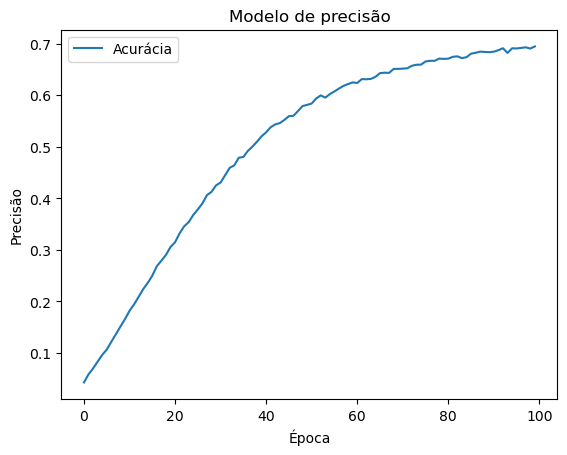

In [40]:
import matplotlib.pyplot as plt


# Plotar a acurácia e a perda durante o treinamento
plt.plot(history.history['accuracy'])
plt.title('Modelo de precisão')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.legend(['Acurácia'], loc='upper left')
plt.show()


In [41]:
def predict_next_words(model, vectorizer, text, max_sequence_len, top_k=3):
    """
    Prediz as próximas palavras mais prováveis em uma sequência de texto.

    Args:
        model: O modelo treinado.
        vectorizer: A camada de vetorização.
        text: O texto de entrada.
        max_sequence_len: O comprimento máximo da sequência usado na vetorização.
        top_k: O número de palavras mais prováveis a serem retornadas.

    Returns:
        As próximas palavras mais prováveis.
    """
    # Vetorizar o texto de entrada
    tokenized_text = vectorizer([text])
    
    # Remover a dimensão extra adicionada pela vetorização
    tokenized_text = np.squeeze(tokenized_text)
    
    # Adicionar padding à esquerda
    padded_text = pad_sequences([tokenized_text], maxlen=max_sequence_len, padding='pre')
    
    # Fazer a previsão
    predicted_probs = model.predict(padded_text, verbose=0)[0]  # Remove a dimensão extra adicionada pela previsão
    
    # Obter os índices dos top_k tokens com as maiores probabilidades
    top_k_indices = np.argsort(predicted_probs)[-top_k:][::-1]
    
    # Converter os tokens previstos de volta para palavras
    predicted_words = [vectorizer.get_vocabulary()[index] for index in top_k_indices]
    
    return predicted_words

In [ ]:
# Amostra do corpus textual utilizado para treino

"""

-South African President Mbeki holds new talks on Ivory Coast President Thabo Mbeki
So Alike, Rivals Make It Personal Since World War II, no two candidates have had such strikingly
-New XP patch issued MICROSOFT has found a new security flaw with its Windows XP operating system
-Intel and Linksys deliver  quot;simpler quot; Wi-Fi software Intel Corp. and Linksys, a division of Cisco
-Eagles running back Brian Westbrook has a broken

"""

text = []

text.append("South African President Mbeki holds new talks on Ivory Coast")
text.append("So Alike, Rivals Make It Personal Since World War II, no two candidates")
text.append("New XP patch issued MICROSOFT has found a new security flaw with its Windows XP")
text.append("Intel and Linksys deliver  quot;simpler quot; Wi-Fi software Intel")
text.append("Eagles running back Brian Westbrook")
            

In [54]:
for i in range(len(text)):
  print(text[i], predict_next_words(model, vectorizer, text[i], 50, top_k=3))

South African President Mbeki holds new talks on Ivory Coast ['leaders', 'law', 'is']
So Alike, Rivals Make It Personal Since World War II, no two candidates ['entered', 'angry', 'study']
New XP patch issued MICROSOFT has found a new security flaw with its Windows XP ['how', 'blast', 'kills']
Intel and Linksys deliver  quot;simpler quot; Wi-Fi software Intel ['won', 'angry', 'ministers']
Eagles running back Brian Westbrook ['close', 'game', 'won']


In [53]:
model.save('modelo_vidente.keras')